Program2: Create a simple feedforward neural network using TensorFlow/Keras or PyTorch.
Train the network on the MNIST dataset.
Evaluate the model's accuracy and visualize some predictions.

Epoch 1/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0779 - accuracy: 0.9941 - val_loss: 0.0414 - val_accuracy: 0.9968
Epoch 2/50
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0334 - accuracy: 0.9959 - val_loss: 0.0269 - val_accuracy: 0.9968
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0285 - accuracy: 0.9959 - val_loss: 0.0277 - val_accuracy: 0.9968
Epoch 4/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0274 - accuracy: 0.9959 - val_loss: 0.0350 - val_accuracy: 0.9968
Epoch 5/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0253 - accuracy: 0.9959 - val_loss: 0.0260 - val_accuracy: 0.9968
Epoch 6/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0228 - accuracy: 0.9959 - val_loss: 0.0363 - val_accuracy: 0.9968
Epoch 7/50
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0229 - accuracy: 0.9959 - val_loss: 0.0348 - val_accuracy:

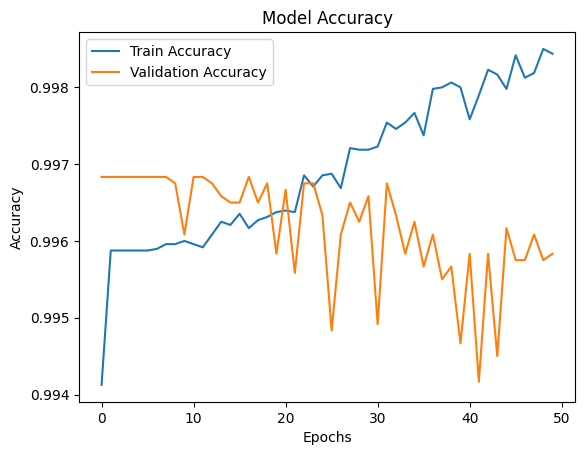

1/1 [==============================] - 0s 90ms/step
Sample 1
True Label: 0, Predicted Label: 0

Sample 2
True Label: 0, Predicted Label: 0

Sample 3
True Label: 0, Predicted Label: 0

Sample 4
True Label: 0, Predicted Label: 0

Sample 5
True Label: 0, Predicted Label: 0



In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load training and testing data from CSV files
train_data = pd.read_csv(r"D:\deepLearningLab\dl_2\fashion-mnist_train.txt")
test_data = pd.read_csv(r"D:\deepLearningLab\dl_2\fashion-mnist_test.txt")

# Separate features and labels
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values

# One-hot encode the labels
num_classes = max(np.max(y_train), np.max(y_test)) + 1  # +1 because classes start at 0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)


# Standardize features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

X_train = X_train / 255.0
X_test = X_test / 255.0


# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Visualize training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Visualize predictions
def visualize_predictions(model, X, y_true, num_samples=5):
    predictions = model.predict(X)
    y_pred = np.argmax(predictions, axis=1)
    y_true = np.argmax(y_true, axis=1)

    for i in range(num_samples):
        print(f"Sample {i+1}")
        print(f"True Label: {y_true[i]}, Predicted Label: {y_pred[i]}")
        print()

visualize_predictions(model, X_test[:5], y_test[:5])


You need to set up Copilot and be signed in to use Chat.

You need to set up Copilot and be signed in to use Chat.